
# Summary
All related code/figures for oSBM. Code organization assumes working directory is notebook folder location. Note, this notebook pulls ReFeX generated features which happen in another script which we modify to create different recursions.

In [1]:
import sys
print(sys.version)
from __future__ import division
import os
#import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
# relevant python libraries
execfile('./functions/python_libraries.py')
# oSBM code
from sklearn.model_selection import RandomizedSearchCV


execfile('./functions/create_oSBM_class_specific_alternative.py')
execfile('./functions/LINK.py')
execfile('./functions/compute_homophily.py')

2.7.15 |Anaconda, Inc.| (default, Oct 23 2018, 13:35:16) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### create 4 graph instances: noB-noO, yesB-noO, noB-yesO, yesB-yesO

In [2]:
disp_val = 0.004

In [3]:
( adj_matrix_gender, gender_y) = create_affiliation_model_temp(84,
                                          lambda_block_parameter =1.2,
                                          dispersion_parameter_vect = np.array([np.array([0, 0]),
                                            np.array([0, 0])]),
                                          class_size_vect = np.array([1000,1000]))

('p_in: ', 0.0504)
('p_out: ', 0.0336)



In [4]:
tag = 'SBM2_new'

In [5]:
gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons
d = {'keys':range(len(gender_y)),
    'gender_y':gender_y}
y_df = pd.DataFrame(d)
Gnx = nx.from_numpy_matrix(adj_matrix_gender,
                           create_using=nx.DiGraph())
fb100_df_tmp = []
for j in nx.generate_edgelist(Gnx, data = False):
    fb100_df_tmp.append(map(np.int,j.split(' ')))
fb100_df = pd.DataFrame(fb100_df_tmp)
fb100_df.columns = ['from','to']
fb100_df_undirect = fb100_df.copy()
fb100_df_undirect['to'] = fb100_df['from']
fb100_df_undirect['from'] = fb100_df['to']
fb100_df = fb100_df.append(fb100_df_undirect)
fb100_df['weight'] = 1
fb100_df.head()
fb100_df.drop_duplicates(inplace = True)
## save output
#fb100_df.to_csv('../../data/SBM/'+tag+'.csv', header = False, index = False)
#y_df.to_csv('../../data/SBM/'+tag+'_gender.csv', header = True, index = False)


### Within Network

In [6]:
## 8/21/2018 - set up logforest model
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


In [7]:
x3 = pd.read_csv('../../code/refex-rolx-master-3/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x3[0]))})
x3 = x3.loc[:,1::] #drop IDs column
scaler.fit(x3) #transform each feature on [0,1]-scale
x3 = scaler.transform(x3)
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')

y3 = df_train.merge(y_train_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

In [8]:
x1 = pd.read_csv('../../code/refex-rolx-master-1/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x1[0]))})
x1 = x1.loc[:,1::] #drop IDs column
scaler.fit(x1) #transform each feature on [0,1]-scale
x1 = scaler.transform(x1)
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')
y1 = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')



In [9]:
x2 = pd.read_csv('../../code/refex-rolx-master-2/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x2[0]))})
print(df_train.head())
x2 = x2.loc[:,1::] #drop IDs column
scaler.fit(x2) #transform each feature on [0,1]-scale
x2 = scaler.transform(x2)
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')
y2 = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

   keys
0  1411
1  1410
2  1415
3   941
4  1414


In [10]:
xall = pd.read_csv('../../code/refex-rolx-master/SBM-data/out_union_0.5SBM_SBM1.csv-featureValues.csv',
                  header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
print(df_train.head())
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)



   keys
0  1411
1  1410
2  1415
3   941
4  1414


In [11]:
y_train_y = pd.read_csv('../../data/SBM/SBM1_gender.csv')
yall = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')

In [12]:
max_depth = [3, 5, 10]
max_depth.append(None)
min_samples_leaf = [1,5]#[0.05, 0.1, 0.2]
min_samples_split = [2,5] #[2, 3, 4, 5, 10]
n_estimators = [50, 100, 1000]#150]
max_features = ['auto', 0.25, 0.5, 0.75]
random_grid = {'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features,
                'n_estimators': n_estimators,
                'min_samples_split': min_samples_split
                }

clf = sklearn.ensemble.RandomForestClassifier(class_weight = 'balanced_subsample')
model1 = RandomizedSearchCV(estimator = clf,
                           param_distributions = random_grid,
                           cv = 3, verbose=0, n_iter = 75,
                           n_jobs = 2)

model2 = RandomizedSearchCV(estimator = clf,
                            param_distributions = random_grid,
                            cv = 3, verbose=0,n_iter = 75,
                            n_jobs = 2)
model3 = RandomizedSearchCV(estimator = clf,
                            param_distributions = random_grid,
                            cv = 3, verbose=0,n_iter = 75,
                            n_jobs = 2)
modelall = RandomizedSearchCV(estimator = clf,
                            param_distributions = random_grid,
                            cv = 3, verbose=0,n_iter = 75,
                            n_jobs = 2)

In [13]:
from sklearn import cross_validation

/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
(mean_accuracy_x3, se_accuracy_x3, 
     mean_micro_auc_x3,se_micro_auc_x3, mean_wt_auc_x3_lbfgs,se_wt_auc_x3)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y3.gender_y), ## gender labels 
                                                                  np.matrix(x3), ## adjacency matrix
                                                                  clf = model3,num_iter=25)

0.95


KeyboardInterrupt: 

In [ ]:
(mean_accuracy_x1, se_accuracy_x1, 
     mean_micro_auc_x1,se_micro_auc_x1, mean_wt_auc_x1_lbfgs,se_wt_auc_x1)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y1.gender_y), ## gender labels 
                                                                  np.matrix(x1), ## adjacency matrix
                                                                  clf = model1,num_iter=25)
    

In [ ]:
mean_wt_auc_x1_lbfgs

In [ ]:
(mean_accuracy_x2, se_accuracy_x2, 
     mean_micro_auc_x2,se_micro_auc_x2, mean_wt_auc_x2_lbfgs,se_wt_auc_x2)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y2.gender_y), ## gender labels 
                                                                  np.matrix(x2), ## adjacency matrix
                                                                  clf = model2,num_iter=25)

In [ ]:
(mean_accuracy_xall, se_accuracy_xall, 
     mean_micro_auc_xall,se_micro_auc_xall, mean_wt_auc_xall_lbfgs,se_wt_auc_xall)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(yall.gender_y), ## gender labels 
                                                                  np.matrix(xall), ## adjacency matrix
                                                                  clf = modelall,
                                                                num_iter=25)


In [ ]:
## LINK set-up
edges = pd.read_csv('../../data/SBM/SBM1.csv', header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
print df.head()
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)


In [ ]:
(mean_accuracy_LINK_RM, se_accuracy_LINK_RM, 
     mean_micro_auc_LINK_RM,se_micro_auc_LINK_RM, mean_wt_LINK_RM,se_wt_LINK_RM)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y_train_y.gender_y), ## gender labels 
                                                                  np.matrix(df), ## adjacency matrix
                                                clf = linear_model.LogisticRegression(penalty='l2',
                                                                           solver='lbfgs',
                                                                            C=10e20),num_iter=25, 
                                                                cv_setup = None)


### node2vec needs added in

In [ ]:
n2v_RM = pd.read_csv('../../code/node2vec/emb/SBM.emb',
                      skiprows=1,
                    header = None,
                      sep=' ')
n2v_RM.head()

In [ ]:
tmp = pd.DataFrame(n2v_RM[0])
tmp.columns = ['keys']

y_labels = tmp.merge(y_train_y[['keys','gender_y']],
              left_on = 'keys',
              right_on = 'keys',
              how = 'left')
np.sum(y_labels['keys']!=n2v_RM[0])

In [ ]:
n2v_RM =n2v_RM[~y_labels.gender_y.isna()]
y_labels =y_labels[~y_labels.gender_y.isna()]

In [ ]:
n2v_RM.drop(0, axis =1, inplace = True)

In [ ]:
## Random Forest Model
(mean_accuracy_node2vec, se_accuracy_node2vec, 
 mean_micro_auc_node2vec,se_micro_auc_node2vec, mean_wt_node2vec_C,se_wt_node2vec)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(y_labels.gender_y).astype(np.int), ## gender labels 
                                                              np.matrix(n2v_RM), ## adjacency matrix
                                                       clf = modelall,
                                                                num_iter=25, 
                                                                     cv_setup = 'stratified')






In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(5,4))#(5, 4))

plt.setp(ax1, xticks=[0,25,50,75,100])
#plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ], 
#         xticklabels=school_names)#subset_schools_new)
#plt.setp(ax1.get_xticklabels(), 
#         rotation=90, size = 10)

ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

w = 1.5
width = 0.15
ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_x1_lbfgs,
            yerr=se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')

ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_x2_lbfgs,
    yerr=se_wt_auc_x2, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='blue')
ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_x3_lbfgs,
    yerr=se_wt_auc_x3, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='darkblue')
ax1.errorbar(percent_initially_labelled*100, mean_wt_auc_xall_lbfgs,
    yerr=se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(percent_initially_labelled*100, mean_wt_LINK_RM,
    yerr=se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')
ax1.errorbar(percent_initially_labelled*100, mean_wt_node2vec_C,
    yerr=se_wt_node2vec, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='red')


ax1.annotate('ReFeX 1x', xy=(3, 0.4), 
         color='deepskyblue', alpha=1, size=10)
ax1.annotate('ReFeX 2x', xy=(3, 0.35), 
         color='blue', alpha=1, size=10)
ax1.annotate('ReFeX 3x', xy=(3, 0.30), 
         color='darkblue', alpha=1, size=10)
ax1.annotate('ReFeX max', xy=(3, 0.25), 
        color='black', alpha=1, size=10)
ax1.annotate('LINK', xy=(3, 0.2), 
         color='gray', alpha=1, size=10)
ax1.annotate('node2vec', xy=(3, 0.15), 
         color='red', alpha=1, size=10)


ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)
ax1.set_ylim(0,1.05)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
plt.title('SBM (Strong Homophily)',fontsize=14)
#plt.show()
plt.tight_layout()
pp = PdfPages('../figs/SBM_instance_within_AUC_final.pdf')
pp.savefig()
pp.close()

## Set-up as Across-Network Problem

In [21]:
x3_test = pd.read_csv('../../code/refex-rolx-master-3/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x3_test[0]))})
x3_test = x3_test.loc[:,1::] #drop IDs column
scaler.fit(x3_test) #transform each feature on [0,1]-scale
x3_test = scaler.transform(x3_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y3_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

In [39]:
x2_test = pd.read_csv('../../code/refex-rolx-master-2/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x2_test[0]))})
x2_test = x2_test.loc[:,1::] #drop IDs column
scaler.fit(x2_test) #transform each feature on [0,1]-scale
x2_test = scaler.transform(x2_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y2_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

In [195]:
x1_test = pd.read_csv('../../code/refex-rolx-master-1/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x1_test[0]))})
print(df_test.tail())


x1_test = x1_test.loc[:,1::] #drop IDs column
scaler.fit(x1_test) #transform each feature on [0,1]-scale
x1_test = scaler.transform(x1_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y1_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

      keys
1995   259
1996   254
1997   253
1998   256
1999   255


In [196]:
x_test = pd.read_csv('../../code/refex-rolx-master/SBM-data/out_union_0.5SBM_SBM2.csv-featureValues.csv', 
                                  header = -1)

df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})
print(df_test.tail())
x_test = x_test.loc[:,1::] #drop IDs column
scaler.fit(x_test) #transform each feature on [0,1]-scale
x_test = scaler.transform(x_test)
y_test_y = pd.read_csv('../../data/SBM/SBM2_gender.csv')

y_test = df_test.merge(y_test_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

      keys
1995   259
1996   254
1997   253
1998   256
1999   255


In [47]:
x_test

array([[0. , 0.1, 0. , ..., 0. , 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 0.1],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0.3, 0.2],
       [0. , 0.1, 0. , ..., 0. , 0.1, 0.1]])

In [26]:
max_depth = [3, 5, 10]
max_depth.append(None)
min_samples_leaf = [0.05, 0.1, 0.2]
min_samples_split = [2, 3, 4, 5, 10]
n_estimators = [50, 100, 150]
max_features = ['auto', 0.25, 0.5, 0.75]
random_grid = {'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features,
                'n_estimators': n_estimators,
                'min_samples_split': min_samples_split
                }

clf = sklearn.ensemble.RandomForestClassifier(class_weight = 'balanced_subsample')
model = RandomizedSearchCV(estimator = clf,
                           param_distributions = random_grid,
                           cv = 3, verbose=0,
                           n_jobs = 2, n_iter = 100)
model.fit(x3,
    y3.gender_y)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=2,
          param_distributions={'max_features': ['auto', 0.25, 0.5, 0.75], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 3, 4, 5, 10], 'max_depth': [3, 5, 10, None], 'min_samples_leaf': [0.05, 0.1, 0.2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [27]:
y_predict_refex = model.predict(x3_test)

y_predict_refex = model.predict_proba(x3_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y3_test.gender_y,np.unique(y3_test.gender_y)),
                                                            y_predict_refex,average='weighted'))


0.531038


In [28]:
y3_auc = metrics.roc_auc_score(label_binarize(y3_test.gender_y,np.unique(y3_test.gender_y)),
                                                            y_predict_refex,average='weighted')

In [42]:
model.fit(x2,
    y2.gender_y)


0.5222955


TypeError: roc_auc_score() takes at least 2 arguments (1 given)

In [44]:
y_predict_refex = model.predict_proba(x2_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y2_test.gender_y,np.unique(y2_test.gender_y)),
                                                            y_predict_refex,average='weighted'))

y2_auc = metrics.roc_auc_score(label_binarize(y2_test.gender_y,np.unique(y2_test.gender_y)),
                                                            y_predict_refex,average='weighted')

0.5222955


In [45]:
model.fit(x1,
    y1.gender_y)


y_predict_refex = model.predict_proba(x1_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y1_test.gender_y,np.unique(y1_test.gender_y)),
                                                            y_predict_refex,average='weighted'))

y1_auc = metrics.roc_auc_score(label_binarize(y1_test.gender_y,np.unique(y1_test.gender_y)),
                                                            y_predict_refex,average='weighted')

0.509936


In [48]:
model.fit(xall,
    yall.gender_y)


y_predict_refex = model.predict_proba(x_test)[:,1]

print(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                            y_predict_refex,average='weighted'))

y_auc = metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                                            y_predict_refex,average='weighted')

0.5321374999999999


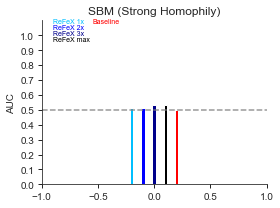

In [62]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                             sharey=False, sharex=False,
                            figsize=(4, 3))
#plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ], 
#         xticklabels=x_labels)
#plt.setp(ax1.get_xticklabels(), rotation=90)

#ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


w = 0.5
width = 0.03
ax1.bar(0.2,0.5, color = 'red', #alpha = 0.5,
        #align = 'right',
       width = width, edgecolor = 'white')

ax1.bar(-0.2,y1_auc, color = 'deepskyblue',# alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.bar(-0.1,y1_auc, color = 'blue', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.bar(0,y3_auc, color = 'darkblue', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.bar(0.1,y_auc, color = 'black', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')
ax1.set_ylabel('AUC')
#ax1.set_xlabel(np.array(range(len(acc_generic)))*w,
#           x_labels[0:11],
#          rotation = 90)
ax1.set_xlim(-1,1)
ax1.set_ylim(0,1.1)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


ax1.annotate('ReFeX 1x', xy=(-0.9,1.08), 
                 color='deepskyblue', alpha=1, size=7)
ax1.annotate('ReFeX 2x', xy=(-0.9,1.08-0.04), 
                 color='blue', alpha=1, size=7)
ax1.annotate('ReFeX 3x', xy=(-0.9,1.08-0.04*2), 
                 color='darkblue', alpha=1, size=7)
ax1.annotate('ReFeX max', xy=(-0.9,1.08-0.04*3), 
                 color='black', alpha=1, size=7)
ax1.annotate('Baseline', xy=(-0.55,1.08), 
                 color='red', alpha=1, size=7)

plt.title('SBM (Strong Homophily)')
#plt.show()

plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
plt.tight_layout()
pp = PdfPages('../figs/SBM_instance_across_AUC_final.pdf')
pp.savefig()
pp.close()